# MCS 275 Spring 2024 Project 2 - Escape of the Minotaur
* Course Instructor: David Dumas

## Instructions:

### Deadline is 11:59pm central time on Friday February 23, 2024

Note that the hour of the deadline is *not* the same as for homework assignments.

On the day of the deadline, it may not be possible for the instructor to answer questions received after 3pm.

### Collaboration

**Collaboration is prohibited**.  We want to evaluate you on the basis of what you can do by consulting the resources listed below, and without help from anyone other than course staff. Seeking or giving aid on this assignment is prohibited (except for asking course staff); doing so constitutes academic misconduct which can have serious consequences. If you are unsure about whether something is allowed, ask. The course syllabus contains more information about the course and university policies regarding academic honesty.

### Topic

You'll use recursion with backtracking to explore solutions to a game that involves traversing a maze containing various kinds of obstacles.

### Resources you are allowed to consult

* Documents and videos posted to the course web page
* Any textbook listed on the course blackboard site under "Textbooks"

**Ask** if you're not sure whether a resource falls into one of these categories, or if you think I missed a resource that seems necessary to complete the assignment.


### What to do if you're stuck

Ask your instructor or TA a question by email, in office hours, or on discord.

## The idea: Escape the labyrinth and avoid Theseus

<figure>
    <img alt="The Cretan labyrinth, engraving, Baccio Baldini, circa 1460.  © The Trustees of the British Museum" src="images/proj2-28987001.jpg" width="75%">
    <figcaption style="text-align: center;">The Cretan labyrinth, engraving, Baccio Baldini, circa 1460<br>© The Trustees of the British Museum, CC BY-NC-SA 4.0</figcaption>
</figure>

### Myth

According to Greek mythology, the **labyrinth** was a vast and complex maze designed and constructed by the master inventor Daedalus on the island of Crete.  A half-human, half-bull creature called the Minotaur was then imprisoned within the labyrinth.  Some years later, Theseus (son of the king of Athens) sailed to Crete, navigated the labyrinth, and killed the Minotaur.  Theseus returned to Athens and was hailed as a hero.

### Rethinking the story

Let's imagine an a different version of the story where the Minotaur is warned of an imminent attack by Theseus and plans an escape from the labyrinth.  We'll make this idea more precise and then give a programming project based on the scenario.

We suppose the labyrinth has unclimbable stone walls and a stone floor, but it is open to the sky above.  (It is often depicted this way in artwork based on the myth.) We suppose the layout is based on a rectangular grid, where some of the grid squares (or *cells*, as we'll call them) are entirely filled by stone walls.  Having spent many long years in a lair at the center of the labyrinth, the Minotaur does not know the full floor plan.  However, Daedalus left behind a few hundred drawings of potential designs, and it is nearly certain one of them shows the final design.  **A speedy escape requires preparing a computer program that can analyze all of the potential maps quickly.**

The labyrinth is not just a maze, for in addition to its winding and branching passages, there are three types of obstacles:
1. There are some deep **pits** lined with sharp spikes; falling into one of these means certain death.
1. Some areas of the maze are blocked by massive **locked doors**.
1. Some floor tiles are actually **spring-loaded traps** that hurl anyone who steps on them high into the air.  The subsequent fall is sure to be deadly, and anyway an object at such height can surely be seen by approaching Athenians. 

Thankfully, the Minotaur has ideas about how to overcome each type of obstacle:
1. The Minotaur can choose to carry a long wooden plank, which can be used as a bridge over any pits.  However, the heavy plank will slow the escape and so it is important to know if it is truly necessary.
1. The Minotaur has found and stockpiled some large brass keys that can unlock any of the doors.  However, each key becomes permanently stuck in the mechanism of whatever door it opens.  (The number of heavy keys to carry is thus an important question.)
1. The Minotaur has a pair of hand-made wax wings (also designed by Daedalus and famously used by his son Icarus who flew too close to the sun).  The wings are too small to allow the large Minotaur to fly, but after stepping on a spring trap they allow the otherwise deadly fall to be turned into a survivable glide.  It will still tip off the Athenians, so this only helps if the Minotaur can glide directly to the exit and make a hasty departure.

The plan to use wings to deal with spring traps is the trickiest and most dangerous part of the plan.  The Minotaur is not sure how far it will be possible to glide after hitting a spring trap, so plans will need to be made for various estimates of the flight range.

### Be the Minotaur

In this project you play the role of the Minotaur, writing a program to solve labyrinths littered with obstacles under various constraints (e.g. presence or absence of a plank, number of keys, limited glide distance).

## The programming details

### First, get the starter pack
* [mcs275proj2start.zip (ZIP download)](https://www.dumas.io/teaching/2024/spring/mcs275/data/mcs275proj2start.zip)

It is a ZIP archive, i.e. a group of files bundled together and compressed into a single file. The first thing you need to do is to extract the starter pack into a directory where you will do your work. Contact the instructor or TA if you need assistance extracting a ZIP file. Windows, MacOS, and most Linux distributions come with a ZIP extractor either built into the operating system or pre-installed.

If you want to browse the starter pack files on github, you can also do that. But the ZIP is the easiest way to download all of them at once (as you must do):

* [Browse the files included in the starter pack](https://github.com/daviddumas/mcs275spring2024/tree/main/projects/proj2starter)

### What's in the starter pack

**You will not edit any of the files in the starter pack.**  They provide a module with classes to represent a labyrinth or to create various examples for testing purposes.

* `labyrinth.py` - A module defining a class `Labyrinth` and subclasses which can generate random labyrinths (without obstacles) or load example labyrinths provided for testing.
* `plane.py` - Planar geometry module as developed in class (with the updated `__eq__` method that was added recently, and which is needed by `labyrinth.py`)

## Data types to know about

A labyrinth is represented by an object of class `Labyrinth` (defined in `labyrinth.py`) which represents a grid of square cells that contain walls, empty space, or obstacles.  It is in some ways similar to the class `Maze` we wrote in lecture, with a few differences as well as extra features to handle the obstacle types.

The functions you write will take a `Labyrinth` as an argument, and one of them will also need to know the Minotaur's *status*, that is, the Minotaur's current equipment and flight characteristics.  (When using recursion to explore the labyrinth, this may change, e.g. as keys are used up).

The status of the Minotaur will always be specified by a dictionary with the following keys and value types:

| key | value type | meaning |
| :-: |:-: | :-: |
| "plank" | bool | True means a plank is carried (can walk over pits) |
| "keys" | int | Number of brass keys (consumed by opening locks) |
| "flight_range" | int or float | Maximum glide distance (max dist from spring trap to exit) |

Here is an example of such a *status dictionary*:

In [1]:
status = {
    "plank": True, # boolean, answers "can pits be traversed?"
    "keys": 5,     # integer, number of brass keys
    "flight_range": 0, # integer or float, maximum distance the Minotaur can glide
                       # using wax wings (0 means wings are not worn)
}

## WHAT YOU NEED TO DO

Write a Python module `minotaur.py` that contains the following functions.  **That is the only file you should submit to Gradescope.**

### Function `solution(lab,status,path=None)`

Given a `Labyrinth` object `lab` and a dictionary `status` describing the equipment and characteristics of the Minotaur, searches for a solution to the labyrinth, i.e. a path from the start to the goal.

Returns either a list of `Point2` objects representing a solution path, or the value `None` if no solution exists under the given conditions.

A solution must take the following into account:
* If the solution calls for the Minotaur to step on a cell containing a pit, then the Minotaur must be carrying a plank (i.e. `status["plank"]` must be `True`), because without it the pits are deadly.  Recall the plank can be used multiple times.
* If the solution calls for the Minotaur to step on a cell containing a locked door, then the Minotaur must have at least one brass key remaining.  Each passage through such a cell uses up one key.  (A cell with a locked door can be approached, unlocked, and exited from any direction.  It is perhaps best thought of as a cell filled with a stone wall that can be removed if one has a brass key.)
* If the solution calls for the Minotaur to step on a cell containing a spring trap, then the distance from that cell to the goal (exit of the labyrinth) must be less than or equal to `status["flight_range"]`, meaning that the Minotaur can glide all the way to the exit after being flung into the air by the trap and thus being seen by the approaching attackers.  Also, to indicate that the Minotaur does this, the **next entry in the solution list must be the location of goal of the labyrinth**.

Notice that the solution might pass through many locks and pit traps, but spring traps are a "one-time-only" event.  A solution has either no spring traps, or exactly one, and in the latter case the spring trap is the second-to-last point in the solution.

Except in the case of the jump from a spring trap to the goal, neighboring points in a solution list must be horizontal or vertical neighbors.

### Function `has_solution(lab, status)`

Given a `Labyrinth` object `lab` and a dictionary `status` describing the equipment and characteristics of the Minotaur, determines whether or not it is possible to solve the labyrinth under the initial conditions desrcibed by `status`.  Returns a boolean value, with `True` indicating that such a solution exists.

### Function `requires_plank(lab)`

Given a `Labyrinth` object `lab`, determines whether it is possible to escape but a plank is absolutely necessary to do so.  That is, returns `True` if:
* The Minotaur **can** escape this labyrinth under some set of conditions, AND
* The Minotaur **cannot** escape without a plank, regardless of the number of keys and the size of their flight distance.

Otherwise, returns `False`.  Equivalently, returns `False` if:
* It is simply impossible to escape this labyrinth, regardless of equipment or flight characteristics, OR
* It is possible to escape without the use of a plank.

### Function `requires_flight(lab)`

Given a `Labyrinth` object `lab`, determines whether it is possible to escape but stepping on a spring trap and gliding to the goal is absolutely necessary to do so.  That is, returns `True` if:
* The Minotaur **can** escape this labyrinth under some set of conditions, AND
* The Minotaur **cannot** escape without use of the wax wings (i.e. if their flight distance is zero, or equivalently, stepping on a spring trap means death).

Otherwise, returns `False`.  Equivalently, returns `False` if:
* It is simply impossible to escape this labyrinth, regardless of equipment or flight characteristics, OR
* It is possible to escape without stepping on a spring trap (and thus without flight).

### Function `min_required_keys(lab)`

Given a `Labyrinth` object `lab` that can be solved under some set of conditions, returns the smallest number of keys that allow the labyrinth to be solved (an integer).  For example:
* Returning `0` means that it is possible to solve the labyrinth without having any keys (though possibly it requires use of a plank and/or flight)
* Returning `1` means that this labyrinth cannot be solved without keys, but there is a way to solve it if the Minotaur begins with one key (though possibly it requires use of a plank and/or flight).
* Returning `2` means this labyrinth cannot be solved with just one key, but it can be solved if the Minotaur begins with two keys.

And so on.

Also, if this function is called with a labyrinth that cannot be solved at all, it should raise `ValueError` because the question doesn't make sense in that case.

## The labyrinth API

Just as we wrote a maze solver that used methods of the `Maze` class to inquire about the walls and empty spaces and find a solution, the functions you will write need to inquire about aspects of the labyrinth.

The `Labyrinth` class defined in `labyrinth.py` has methods for this purpose.  They are documented in this section.

### Types of cells

The labyrinth is divided into a rectangular grid of cells, with `xsize` columns and `ysize` rows.  The location of a cell is specified by a `Point2` object with integer coordinates.

The content of any cell is indicated by an integer, the *cell type*, which is one of these values in the table below.  For each cell type, there is also a global constant in the module `labyrinth` that contains the value.  Using these named constants can help make your code more readable (compare `if ct == 40:` to `if ct == labyrinth.CT_SPRING:`).

| Cell type (int)      | Cell type (constant) | Meaning |
| ---:        |    :----   |          :--- |
| 0      | labyrinth.CT_WALL       | Filled with stone wall  |
| 1      | labyrinth.CT_START       | The Minotaur's lair, the starting point |
| 2      | labyrinth.CT_GOAL       | The exit from the labyrinth |
| 3      | labyrinth.CT_EMPTY       | Empty space |
| 20      | labyrinth.CT_PIT       | A pit with deadly spikes at the bottom |
| 30      | labyrinth.CT_LOCK       | You can pass through only by using up one key |
| 40      | labyrinth.CT_SPRING       | A spring trap that hurls you into the air  |

### Aspects of `Labyrinth` class that you can use in `minotaur.py`

These are methods and attributes that every `Labyrinth` object has, and which you are allowed use in `minotaur.py`.  In describing method, we omit the implicit `self` argument and just write it method the way it would be called.

#### Attribute `start`
Read-only.  An attribute of type `Point2` indicating where the Minotaur's lair is.  That is where any solution must start.  Equivalently, the return value is the location of the only cell whose type would be `1`/`labyrinth.CT_START`.

#### Attribute `goal`
Read-only.  An attribute of type `Point2` indicating where the exit/goal is.  That is where any solution must end.  Equivalently, the return value is the location of the only cell whose type would be `2`/`labyrinth.CT_GOAL`.


#### Method `get_cell(p)`
Returns an integer giving the type of cell located at `Point2` object `p`.

#### Method  `non_wall_neighbors(p)`
Returns a list of `Point2` objects that are horizontal or vertical neighbors of the cell at `Point2` object `p`, and which do not contain walls.  (They may be of any cell type other than `0`/`labyrinth.CT_WALL`.)

#### Methods `is_*`

Several methods take a `Point2` object `p` and return a boolean indicating whether it is a specific cell type.  Here is a list of them:
* `is_wall(p)` - checks for type `0`/`labyrinth.CT_WALL`
* `is_start(p)` - checks for type `1`/`labyrinth.CT_START`
* `is_goal(p)` - checks for type `2`/`labyrinth.CT_GOAL`
* `is_empty(p)` - checks for type `3`/`labyrinth.CT_EMPTY`
* `is_pit(p)` - checks for type `20`/`labyrinth.CT_PIT`
* `is_lock(p)` - checks for type `30`/`labyrinth.CT_LOCK`
* `is_spring(p)` - checks for type `40`/`labyrinth.CT_SPRING`

#### Methods `num_*`

Several methods take no arguments and return the number of some type of cell in this labyrinth.  Here is a list of them:
* `num_pits()` - returns number of pits (cells of type `20`/`labyrinth.CT_PIT`)
* `num_locks()` - returns number of locks (cells of type `30`/`labyrinth.CT_LOCK`)
* `num_springs()` - returns number of spring traps (cells of type `40`/`labyrinth.CT_SPRING`)

### Aspects of `Labyrinth` class that you CANNOT use in `minotaur.py`

These allow you to make changes to a labyrinth, which is not allowed in `minotaur.py` since those functions only examine existing characteristics.  These methods are useful for making labyrinth objects, which you will need to do in order to test your work.

As before the methods are written in the form you'd call them, omitting `self` and using the class name instead of `__init__` for the constructor.

#### Constructor `Labyrinth(xsize, ysize)`

Makes a new labyrinth of the given x- and y-sizes (integers).  Initially, every cell is a wall.

#### Attribute `start`
As before, but outside `minotaur.py` you can modify (assign a value to) this attribute.

#### Attribute `goal`
As before, but outside `minotaur.py` you can modify (assign a value to) this attribute.

#### Method `apply_empty_interior`
Makes every cell that isn't on the edge of the grid an empty cell (type `3`/`labyrinth.CT_EMPTY`).  Thus the labyrinth is a big square of walls with nothing inside.

#### Method `set_cell(p, k)`
Sets the type of cell located at `Point2` object `p` to the integer cell type `k`.  Any type *except* start and goal can be set this way.  To set the start or goal, either assign to the attribute directly or call `set_start`/`set_goal` (documented below).

#### Convenience methods `set_*`
Several methods take a `Point2` object `p` and set the type of cell at that location to a specific value.  In most cases this is equivalent to calling `set_cell(p,k)` for certain value of `k`.  These convenience methods are:

* `set_wall(p)` - Make `p` a cell of type `0`/`labyrinth.CT_WALL`
* `set_start(p)` - Make `p` the start of the labyrinth (type `1`/`labyrinth.CT_START`).  If a starting location was already set, the previous starting cell will revert back to whatever type it was before it was made the start (or `0`/`labyrinth.CT_WALL` if no previous value existed).
* `set_goal(p)` - Make `p` the goal/exit of the labyrinth (type `2`/`labyrinth.CT_GOAL`).  If a goal location was already set, the previous goal cell will revert back to whatever type it was before it was made the goal (or `0`/`labyrinth.CT_WALL` if no previous value existed).
* `set_empty(p)` - Make `p` a cell of type `3`/`labyrinth.CT_EMPTY`
* `set_pit(p)` - Make `p` a cell of type `20`/`labyrinth.CT_PIT`
* `set_lock(p)` - Make `p` a cell of type `30`/`labyrinth.CT_LOCK`
* `set_spring(p)` - Make `p` a cell of type `40`/`labyrinth.CT_SPRING`

#### Method `save(fp)`

If `fp` is a file object that is currently open for writing, saves a copy of this labyrinth to that file.  Sample usage:

In [2]:
# suppose `L` is a `Labyrinth` object
# in particular `labyrinth` has already been imported and used
with open("mylabyrinth.dat","w") as fp:
    L.save(fp)

#### How to load a labyrinth from a file

The method `L.save(fp)` writes a labyrinth object `L` to a file.  To read a labyrinth from a file and return the corresponding object, you need to call `Labyrinth.load(fp)` with `fp` a file open for reading.  Note you don't create a labyrinth instance directly in this case; you call `.load` using the **class name** `Labyrinth`.  It makes an instance and returns it.  Sample usage:

In [3]:
from labyrinth import Labyrinth

with open("mylabyrinth.dat","r") as fp:
    L = Labyrinth.load(fp)
    
# Now `L` is a `Labyrinth` object with the layout previously saved to that file

## Other features of `labyrinth.py`

### Function `sample_labyrinth(n)`

<span style="color:red;"><strong>THIS SECTION RECENTLY UPDATED</strong></span>

This function returns a sample labyrinth with identifier `n`, which can be an integer or a string.

If `n` is an integer, it must be between `0` and `8`.  The returned labyrinth is one of the samples first provided as part of the starter pack.  The returned value will be a labyrinth that also has a `.info` attribute to tell you about the example's properties.

If `n` is a string, then this function returns one of the *named autograder labyrinths*.  These are labyrinths used in the project 2 autograder, and the report from the autograder may mention a specific labyrinth by name when describing a failed test.

### Function `SampleLabyrinth.builtin_labyrinth_names()`

<span style="color:red;"><strong>THIS SECTION RECENTLY ADDED</strong></span>

Call this function to get a list of all named sample labyrinths (i.e. labyrinths used by the autograder) that are available.  Note that there are also numbered sample labyrinths that are not included in this list (they have identifiers `0`,`1`,`2`,`3`,`4`,`5`,`6`,`7`,`8`).

Here is the list it currently returns:

In [10]:
from labyrinth import SampleLabyrinth

SampleLabyrinth.builtin_labyrinth_names()

['lev1_tree_simple',
 'lev1_loop_simple',
 'lev1_open_simple',
 'lev1_loop_mid',
 'lev2_corridor_1_pit',
 'lev2_corridor_many_pit',
 'lev2_corridor_slalom1',
 'lev2_corridor_slalom2',
 'lev2_open_full_pits',
 'lev2_open_avoid_pits',
 'lev3_loop_obstacle_choice',
 'lev3_open_filled_obstacles',
 'lev3_loop_can_avoid_pits',
 'lev3_tree_can_avoid_all',
 'lev3_corridor_filled_both_required',
 'lev4_corridor_clear_flight_needed',
 'lev4_corridor_pit_or_flight',
 'lev4_tree_flight_or_both',
 'lev4_big_almost_tree',
 'lev4_loop_flight_needed',
 'lev4_room_nearly_full']




### Class `RandomLabyrinth`

A subclass of `Labyrinth`.  Call `RandomLabyrinth(xsize,ysize)` with both sizes odd to return a Labyrinth with its `start` and `goal` set, with an interesting maze of passages, but which has only walls and empty cells.  You would want to add some obstacles if you are testing those features.  Uses Prim's algorithm.

### Text representation

`Labyrinth` has `__str__` and `__repr__` methods that produce text graphics of the labyrinth.  Cell types are represented by different characters, as shown here:


| Char | Cell type |
| :--: |    :----             |
| █ | Wall       |
| S |  Start      |
| G | Goal    |
|   | Empty cell    |
| o | Pit       |
| ? | Lock  |
| ^ | Spring trap |

Here's an example.

In [9]:
from labyrinth import *

L = sample_labyrinth(7)
print(L)

███████████G█████████████████
█ o   █ o █ █ █ █ █o█ ?   █ █
███ ███ ███?█o█ █ █ ███ ███ █
█ █      o█ █?█   █ █o█ █^  █
█ █ █ █████ █ ███ █ █ █ █ █ █
█  o█ █   █ █   █ █ ^ █ █ █ █
███ ███ ███ █ ███ █ █?█?███ █
█     o   █?        █ █ █  ^█
███ ███████ █ █ ███ ███ █ █ █
█?█ █     █?█ █^█ █   █ █ █ █
█ █ █████ █████ █ █████ ███ █
█           █^█     ? █   █ █
███ ███ ███ █ █ ███████ ███ █
█ █ █ █ █   ?  ?   ? ?    █ █
█?█ █ █████ █ █ ███?█o█████ █
█ ^ o █ █ █ █ █   █ █     █ █
███^███ █ █████ █████ █████ █
█     █ █?  █ █ █ █ █S█?? █?█
█ ███ █ ███ █ ███ █ █?███o█ █
█   █o█ ?    o    █ █o      █
█ █████o█████?███ █ █ ███ ███
█   █   █     █?█    ?  █  ?█
█?█ ███████ ███o█ ███ ███?███
█ █ █       █   █ █ ^ █ █   █
█ ███ █████ ███ █████^█ █████
█ █ █ █ █   █     █ █   █o  █
█?█ █ █?█ █ █████ █ █ ███ ███
█  o█ █ o █ █  ^o?          █
█████████████████████████████


### Graphics in Jupyter

Calling the method `as_image()` of a `Labyrinth` object will return an image object that Jupyter can display directly in the notebook.  (Displaying inline images this way doesn't seem to work in VS Code's notebook editing system.)  This is convenient to see mazes that you're working on, e.g.

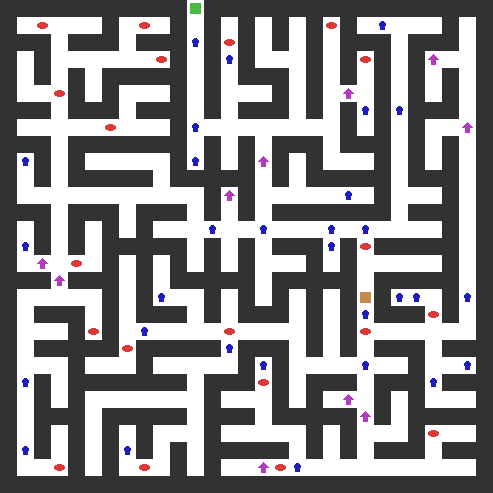

In [23]:
from labyrinth import *

L = sample_labyrinth(7)
L.as_image()

and just like the image-saving methods in our `Maze` class, you can ask for a set of cells to be highlighted.

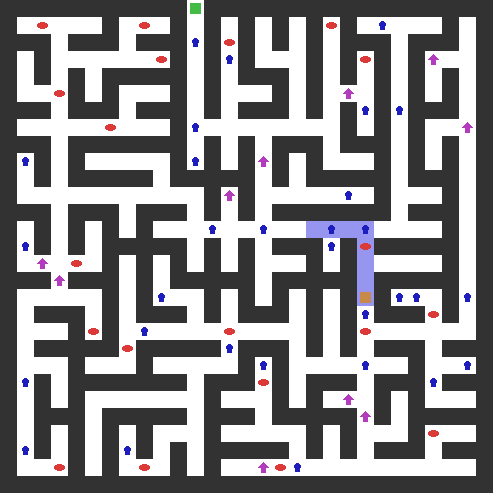

In [24]:
L.as_image(highlight=[
    Point2(21,17),
    Point2(21,16),
    Point2(21,15),
    Point2(21,14),
    Point2(21,13),
    Point2(20,13),
    Point2(19,13),
    Point2(18,13)
])

In these graphical representations, obstacles are distinguished by icons with unique colors and shapes. Pass a keyword argument `scale` with a larger integer value to see a higher-resolution picture.

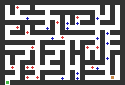

In [28]:
L = sample_labyrinth(5)
L.as_image(scale=5)

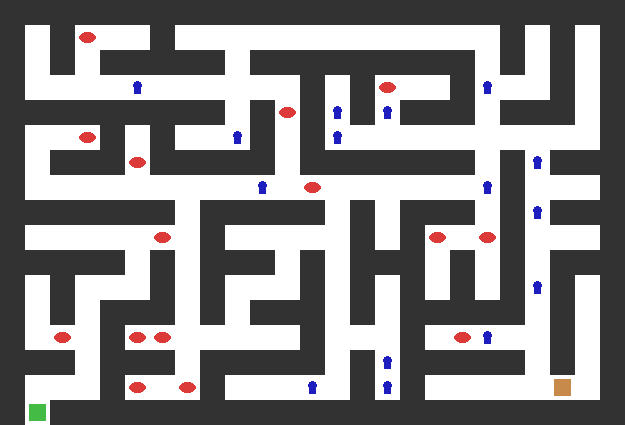

In [29]:
L = sample_labyrinth(5)
L.as_image(scale=25)

Here is a key to the colors and icon shapes used for the different obstacles:

![cell icons key](images/proj2-ct-icon-key.png)


### Saving graphics to files

`Labyrinth` also has a `save_png(fn)` method that works just like the one from `Maze`, saving a picture of the labyrinth to a file.  Like `Maze.save_png`, it can also accept a `highlight` argument to highlight some cells (in light blue).

Example:

In [30]:
# Write sample labyrinth #2 to a PNG file
from labyrinth import *
L = sample_labyrinth(2)
L.save_png("sample_labyrinth_2.png",scale=10)

## Suggested approach and advice

### The most important function

<span style="color:red;"><strong>THIS SECTION RECENTLY ADDED</strong></span>

The function `solution(...)` is the most important, because the other functions are sure to depend on it to do their work.  It will also account for most of the autograder points.  Give it the attention it deserves!

### Use the `CT_*` constants

<span style="color:red;"><strong>THIS SECTION RECENTLY ADDED</strong></span>

The code in `minotaur.py` will be much more readable if you use the named constants like `CT_EMPTY` instead of integer literals like `3`.  To that end, I suggest that you make the first line of actual code in `minotaur.py` either

In [ ]:
from labyrinth import *

which makes everything in `labyrinth.py` available, OR

In [ ]:
from labyrinth import CT_EMPTY, CT_PIT, CT_START, CT_SPRING, CT_WALL, CT_GOAL, CT_LOCK

which selectively imports just the `CT_*` constants.



### Level by level

The task described above is complicated because there are several types of obstacles.  Here is how I suggest you work

Let's call a labyrinth:
* Level 1 if it has no obstacles, i.e. only walls, empty space, a start, and a goal
  - Equivalently, level 1 means all cells have types $\leq$ 10
  - This is the kind of labyrinth returned by `RandomLabyrinth(...)`
* Level 2 if it has only pit obstacles
  - Equivalently, level 2 means all cells have types $\leq$ 20
* Level 3 if it has only pit and lock obstacles
  - Equivalently, level 3 means all cells have types $\leq$ 30
* Level 4 if it is allowed to have pits, locks, and spring traps
  - Equivalently, level 3 means all cells have types $\leq$ 40
  
The autograder will run tests of your functions for examples of each level, whenever possible.  (For example, `requires_flight` doesn't make sense to test on labyrinths of level 3 or lower.)

Thus, it would be a good idea to start by writing and testing a `solution(...)` function that works for labyrinths of level 1.  That will be most similar to the maze solver we covered in class.

Then, move up to level 2, adding additional logic to the `solution` function and testing it.  At this point it becomes possible to write `requires_plank` as well.

Continue in this way, adding features and functions as appropriate to each level.

### Testing method

I suggest you test `minotaur.py` using a notebook, where the usual sequence would be:
* Modify `minotaur.py`
* Go to your working notebook and restart the Python kernel so you can reimport
* Run a cell that imports the necessary modules
* Create a Labyrinth, either by hand or using a provided example
* Try the functions from `minotaur.py` on that labyrinth and examine the results.  Check by hand or by comparing against info given for the example labyrinths.

Here's an example of what your import cell might look like:

In [ ]:
# Suggested starting point for notebook work with your project
from plane import Point2, Vector2
from labyrinth import *  # to avoid labyrinth.--- everywhere
from minotaur import * # gets all functions defined in minotaur module

Then, a test might look like

In [36]:
L = RandomLabyrinth(xsize=13,ysize=7) # starting point: tree maze

# Now you'd add some additional open space with 
# calls to L.set_empty and maybe some obstacles
# with calls to L.set_pit, L.set_spring, L.set_lock
# ...

# show the labyrinth (text graphics)
print(L)

# show a solution for a particular situation (no plank, one key, can glide distance 2)
st = {
    "plank": False,
    "keys": 1,
    "flight_range": 2,
}
print()
print(solution(L,st))  # if there is a solution, shows it; else prints None

█████████████
█ █       █ █
█ █ ███ ███ █
█     █S    █
█ █ █ █ █ ███
█ █ █ █ █   █
█G███████████

[Point2(7,3), Point2(7,2), Point2(7,1), Point2(6,1), Point2(5,1), Point2(4,1), Point2(3,1), Point2(3,2), Point2(3,3), Point2(2,3), Point2(1,3), Point2(1,4), Point2(1,5), Point2(1,6)]


## Dictionary gotchas

There's an issue I think may cause you trouble when you work on this project, and I want to give some advice to prevent that.

**Short version:** If a dictionary is passed to a function, don't modify the dictionary inside the function.  If you think there is a reason to do so, instead make a copy of that dictionary and change the copy.

**In more detail:** Python dictionaries are mutable, which can create some surprises.  For example, if you pass an integer variable as an argument to a function and then modify the argument inside the function, the global integer variable is unchanged:

In [22]:
def change(x):
    x += 5
    print(x,"is the new value of my argument, in the function")
    
x = 3
print(x)  # 3
change(x)
print(x,"  <---- UNCHANGED")  # still 3

3
8 is the new value of my argument, in the function
3   <---- UNCHANGED


But if you pass a dictionary and then change the value associated with some key, it **does** affect the global dictionary:

In [23]:
def change_value_in(d):
    d["a"] += 5
    print(d["a"],"is the new value associated to 'a', in the function")

d = {"a":3, "b": -2, "c":"perfunctory derision"}
print(d["a"])
change_value_in(d)
print(d["a"],"  <---- CHANGED GLOBALLY?!")

3
8 is the new value associated to 'a', in the function
8   <---- CHANGED GLOBALLY?!


This happens because `d["a"] += 5` is really a method call on `d`, so it's not that you're replacing `d` with a new value (which would be local), rather you're asking the global `d` to do something for you (modify one of its values).

Often this means it is a bad idea to modify a dictionary inside a function.  Instead, make a copy and modify the copy.  Here's an expression that creates a copy of a dictionary named `d`.

In [17]:
{ k:d[k] for k in d }  # this expression produces a copy of `d`, a dictionary

{'a': 8, 'b': -2, 'c': 'perfunctory derision'}

Here's how it might be used in the example above.

In [25]:
def change_value_in(d):
    dcopy = {k:d[k] for k in d}
    dcopy["a"] += 5
    print(dcopy["a"],"is the new value associated to 'a' in my local copy")

d = {"a":3, "b": -2, "c":"perfunctory derision"}
print(d["a"])
change_value_in(d)
print(d["a"],"  <---- UNCHANGED")

3
8 is the new value associated to 'a' in my local copy
3   <---- UNCHANGED


## IMPORTANT RULES YOUR CODE MUST FOLLOW

Your project must follow the rules in the [MCS 275 coding standards](https://www.dumas.io/teaching/2024/spring/mcs275/nbview/policies/codestd.html) document.  In addition:

* **Only submit `minotaur.py`** - The autograder will supply everything else.

* **No changes to existing classes** - Obviously it would be a bad idea to change anything in the files provided in the sample pack, since the autograder will use fresh unmodified copies when testing your work.

* **No output** - The functions in `minotaur.py` must not print anything.

* **No modification of status dictionary** - After calling a function from `minotaur.py` that accepts a status dictionary, the values in that dictionary must not be changed.  Rather than making changes, create new dictionaries as needed.

* **Clean import** - Importing `minotaur.py` should not do anything other than defining functions.  It's fine to include test code, but put it inside a `if __name__=="__main__":` block so it only runs when the file is executed as a script.

* **Make proper use of structured programming** - Several of the functions in `minotaur.py` are most naturally written by calling other functions in the same file.  Make use of that technique when appropriate, rather than having lots of duplicated or near-duplicate code.

* **No use of `float` except for distance comparison** - The only time you can use float values is to compute and compare distances between points, i.e. to determine whether the `flight_distance` in a status dictionary is greater than the distance between the current cell and the goal.  Remember that `Vector2` has an `abs()` method so you can compute the distance from `p` to `q` with `abs(q-p)`!

* **Reasonable efficiency** - The autograder will allow up to 5 seconds for each test case to run, and will not give credit if a test runs longer than that.  These tests will use labyrinths sized so that a reference solution based on the techniques covered in lecture returns an answer in a small fraction of a second, so there is considerable leeway for a correct answer to have some level of inefficiency and still pass the tests.  However, functions that can in principle return the correct answer but only after doing a huge amount of unnecessary or inefficient work may lose credit due to these time-outs.

## How your project will be graded

### Autograder: 40 points

The autograder tests your program and grades it based on its **behavior**.  A series of tests will be run checking the return values and behavior of the functions in `minotaur.py` against the specifications in this document.

### Manual review: 10 points

I will review your code and look for adherence to the coding standards and other rules given above, and I will examine your method of solving the problem.  If I see that your program does not do what was requested in this document, but the error was not detected in the automated testing, a deduction may be given at this point.  The scores assigned by the autograder will not be changed during manual review unless I discover some kind of intentional wrongdoing (such as an attempt to circumvent or reverse-engineer the autograder's operation).

### Revision history

* 2024-02-12 Initial publication
* 2024-02-19 Updated to discuss autograder sample labyrinths recently added and give a bit more advice
* 2024-03-02 Typo fixed (retrospective)